In [ ]:
# Logistik regresyon modelimizde kullanacağımız sentetik verileri manuel olarak nasıl oluşturacağımızı göreceğiz.  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Sınıflandırma regresyon modellerinde en az 2 adet etiketlenmiş kategorik sonuçlar kullanılır.
# Biz örneğimizde 4 farklı sınıf oluşturacağız:

         x1        x2  target
0  7.423745 -2.744378       1
1  7.436825 -1.865573       1
2 -1.664091 -4.014664       2


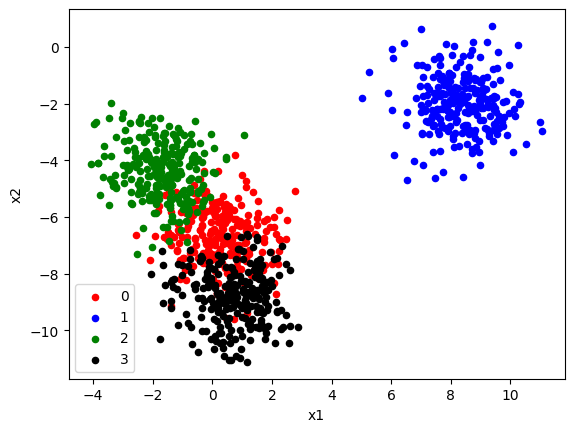

In [9]:
#blobs veriseti
from sklearn.datasets import make_blobs
x, y= make_blobs(n_samples = 1000 # satır sayısı
                 ,centers = 4 #etiket adedi
                 ,n_features = 2) #özellik sayısı
df = pd.DataFrame({"x1":x[:,0], "x2":x[:,1], "target":y})
print(df.head(3)) #örnek verisetinden
colors = {0:'red', 1:'blue', 2:'green', 3: 'black'}
fig, ax = plt.subplots()
grouped = df.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()
    

In [ ]:
# Yukarıda scatter plot ile üretilen sentetik verinin dağılımlarına grafikten oluşabilirsiniz. Her bir renk bir kümeyi temsil eder.

In [ ]:
# 2li sınıflandırma problemleri için make_moons fonk kullanılır. Sınıflara bağlı özelliklerin gürültü ve şekillerinin kontrol edilebilmesini sağlar.

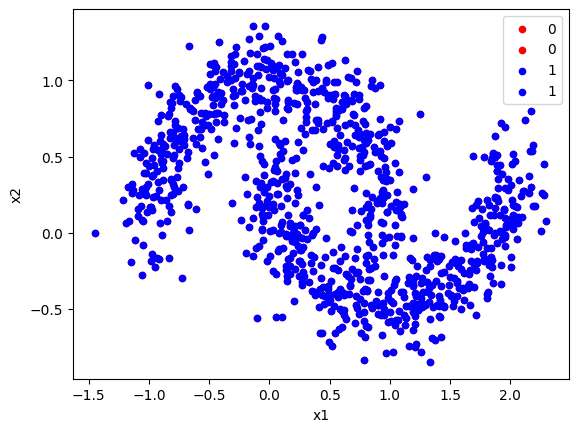

In [13]:
from sklearn.datasets import make_moons
#2boyutlu veriseti
x,y = make_moons(n_samples=1000, noise=0.15) #verideki gürültü değeri
df = pd.DataFrame({"x1":x[:,0], "x2":x[:,1], "target":y})
colors = {0:'red', 1:'blue'}
fig,ax= plt.subplots()
grouped = df.groupby('target')
for key, group in grouped:
    grouped.plot(ax=ax,kind='scatter',x='x1',y='x2',label=key,color=colors[key])
plt.show()

In [ ]:
#2li sınıflandırmaya dair başka bir fonk olan make_circle ise merkezi daireler biçiminde veriseti oluşturur

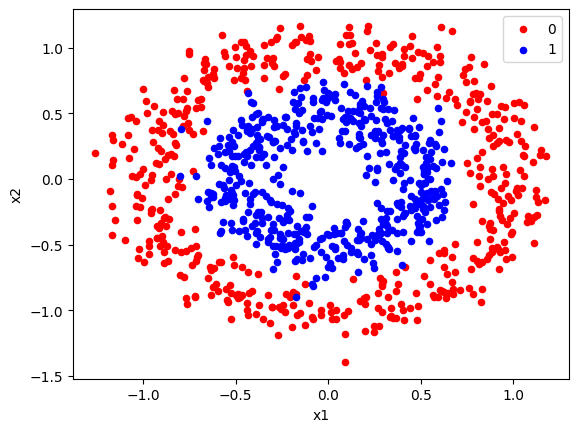

In [18]:
from sklearn.datasets import make_circles
x,y = make_circles(n_samples=1000, noise=0.12, factor=0.5)
df = pd.DataFrame({"x1":x[:,0], "x2":x[:,1], "target":y})
colors = {0:'red' ,1:'blue'}
fig, ax= plt.subplots()
grouped = df.groupby('target')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter',x='x1', y='x2', label=key, color = colors[key])
plt.show()

In [ ]:
#Regresyon için verisetleri
#make_regression fonk ile aralarında doğrusal ilişkinin var olduğu veri setleri oluşturulabilir.
#fonk içerisinde yer alan parametreler:
make_regression(
    n_samples=1000, #veriadedi
    n_features =30, #değişkenadedi
    n_informative = 5, #açıklayıcı değişkenadedi
    n_targets = 1, #hedef - bağımlı değişkenadedi
    bias= 0.0, #doğrusal modeldekiyanlılık
    effective_rank = None, #etkili değişken sayısı
    tail_strength = 0.5, # effective rank none değilse deger verilebilir
    noise = 0.0 , #gaussian dağılımının standartsapması
    shuffle = True , #satirsayısıveya sutunların karıştırılması
    coef = False , #katsayı uretimi olacakmı
    random_state = None #rasgele verisecimi
)

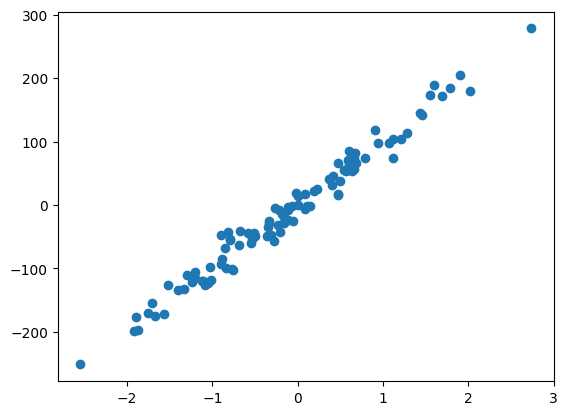

[98.48563938 14.60764646]


In [20]:
from sklearn.datasets import make_regression
x,y, coef = make_regression(n_samples = 100
                       ,n_features = 2
                       ,n_informative = 2
                       ,n_targets = 1
                       ,bias = 0.1                       
                       ,coef = True)

df = pd.DataFrame({"x1":x[:,0],"target":y})

colors = {0:'red', 1:'blue'}
plt.scatter(df.x1,df.target)
plt.show()

print(coef) #katsayilar

In [ ]:
#Sentetik Veri Setinden Regresyon Analizi

In [22]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#2boyutlubir veriseti
x,y = make_regression(n_samples=1000,
                        n_features=1,
                        n_informative=1,
                        n_targets=1,
                        bias=0.9,
                        noise=2.5)
#veri kümesinni test ve train olarak ayırma
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#modelleme
lr = LinearRegression()
lr.fit(x_train,y_train)

#modeldegerlendirme
print("coefficients ",lr.coef_)
print("intercept",lr.intercept_)
print("r2 score",metrics.r2_score(lr.predict(x_test),y_test))
print('(MSE) Mean Squared Error:', metrics.mean_squared_error(lr.predict(x_test),y_test))
print('(RMSE) Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(lr.predict(x_test),y_test)))

coefficients  [5.95144919]
intercept 0.9596040516837396
r2 score 0.8336402157883946
(MSE) Mean Squared Error: 5.997736827558578
(RMSE) Root Mean Squared Error: 2.4490277310717774


In [ ]:
# Bu değerler, bir regresyon modelinin performansını özetler: modelin katsayısı 5.95 olup, bağımsız değişkenin hedef değişken üzerindeki etkisini gösterir; 0.96’lık sabit terim başlangıç değeridir; R²=0.83 modelin verilerin %83’ünü açıkladığını belirtir; MSE=5.99 ve RMSE=2.45 ise tahminlerin ortalama hata büyüklüğünü ifade eder.

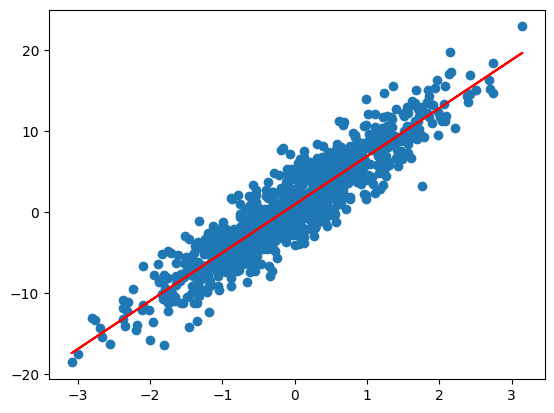

In [26]:
#modelden çıkan regresyon doğrusu:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')
plt.show()